# Labeling Data terhadap Tweet "Dirty Vote" menggunakan NLTK, TweetBlob dan Vadersentiment

In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('dirty_vote.csv', delimiter=";")
data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Feb 11 23:59:58 +0000 2024,1756830469101109662,"harusnya dokumenter dirty vote ada versi full,...",0,0,0,1,in,3246152630,1756830469101109662,lembedang,https://twitter.com/lembedang/status/175683046...
1,Sun Feb 11 23:59:55 +0000 2024,1756830453301137625,"Keramaian Dirty Vote, Ibu Connie juga menyampa...",0,0,0,0,in,69834086,1756830453301137625,IntanAyuArimbi,https://twitter.com/IntanAyuArimbi/status/1756...
2,Sun Feb 11 23:59:54 +0000 2024,1756830452701360439,"Semalem mau lanjutin nonton dirty vote, tapi g...",0,0,0,0,in,1270850215239512064,1756830452701360439,Hazellnuy,https://twitter.com/Hazellnuy/status/175683045...
3,Sun Feb 11 23:59:54 +0000 2024,1756830451149525155,#DirtyVote Semoga ORANG/INSTITUSI yg disebut ...,0,0,0,0,in,1716060084286177280,1756830451149525155,Syahruzy44356,https://twitter.com/Syahruzy44356/status/17568...
4,Sun Feb 11 23:59:50 +0000 2024,1756830432652623986,"Amazing, DIRTY VOTE menuju 3 JT dan Trending d...",13,13,116,281,in,1334853481019056128,1756830432652623986,Mdy_Asmara1701,https://twitter.com/Mdy_Asmara1701/status/1756...
...,...,...,...,...,...,...,...,...,...,...,...,...
837,Sun Feb 11 23:07:45 +0000 2024,1756817328887705662,semoga tim dirty vote baik2 aja🥹,0,0,0,1,in,367784889,1756817328887705662,raniaakh_,https://twitter.com/raniaakh_/status/175681732...
838,Sun Feb 11 23:07:43 +0000 2024,1756817316715831486,Ada 2 tipe penjilat : Pertama menjilat untuk...,13,47,217,503,in,1603708091266396162,1756817316715831486,aly_benzema,https://twitter.com/aly_benzema/status/1756817...
839,Sun Feb 11 23:07:42 +0000 2024,1756817313658208599,@Fahrihamzah @partaigeloraid Apakah benar Part...,0,0,0,0,in,1514936487468404741,1756726549230104638,Debus_Banten,https://twitter.com/Debus_Banten/status/175681...
840,Sun Feb 11 23:07:40 +0000 2024,1756817305701605770,"Tapi, anak-anak SMA ada gak ya yang ngikutin D...",0,0,0,0,in,576338536,1756816751650890091,m_iqbaljr,https://twitter.com/m_iqbaljr/status/175681730...


In [3]:
# Cek jumlah data yang didapatkan

num_tweets = len(data)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 842.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           842 non-null    object
 1   id_str               842 non-null    int64 
 2   full_text            842 non-null    object
 3   quote_count          842 non-null    int64 
 4   reply_count          842 non-null    int64 
 5   retweet_count        842 non-null    int64 
 6   favorite_count       842 non-null    int64 
 7   lang                 842 non-null    object
 8   user_id_str          842 non-null    int64 
 9   conversation_id_str  842 non-null    int64 
 10  username             842 non-null    object
 11  tweet_url            842 non-null    object
dtypes: int64(7), object(5)
memory usage: 79.1+ KB


In [5]:
data.drop_duplicates(subset ="full_text", keep='first', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 841
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           842 non-null    object
 1   id_str               842 non-null    int64 
 2   full_text            842 non-null    object
 3   quote_count          842 non-null    int64 
 4   reply_count          842 non-null    int64 
 5   retweet_count        842 non-null    int64 
 6   favorite_count       842 non-null    int64 
 7   lang                 842 non-null    object
 8   user_id_str          842 non-null    int64 
 9   conversation_id_str  842 non-null    int64 
 10  username             842 non-null    object
 11  tweet_url            842 non-null    object
dtypes: int64(7), object(5)
memory usage: 85.5+ KB


In [7]:
df_alay = pd.read_csv('new_kamusalay.csv', encoding='ISO-8859-1', header=None)
df_alay = df_alay.rename(columns={0: 'alay', 1: 'formal'})
df_alay_dict = dict(zip(df_alay['alay'], df_alay['formal']))

In [8]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words_indonesia = set(stopwords.words('indonesian'))

def case_folding(text):
    return text.lower()

def clean(text):
    clean1 = re.sub('\n', '', text)
    clean2 = re.sub('RT', ' ', clean1)
    clean3 = re.sub('USER', ' ', clean2)
    clean4 = re.sub('(http|https):\/\/\S+', ' ', clean3)
    clean5 = re.sub('[^0-9a-zA-Z]+', ' ', clean4)
    clean6 = re.sub('x[a-z0-9]{2}', ' ', clean5)
    clean7 = re.sub("\d+", ' ', clean6)
    clean8 = re.sub('  +', ' ', clean7)
    clean9 = re.sub('user', ' ', clean8)
    return clean9

def tokenization(text):
    text = re.split('\W+', text)
    return text

def menghilangkan_stopwords(text):
    filtered_words = [word for word in text if word.lower() not in stop_words_indonesia]
    return filtered_words

def alay_normalization(text):
    newlist = []
    for word in text:
        if word in df_alay_dict:
            text = df_alay_dict[word]
            newlist.append(text)
        else:
            text = word
            newlist.append(text)
    return newlist

def clean_non_existed(text):
    if text == '':
        return None
    else:
        return text

def cleansing(text):
    text = case_folding(text)
    text = clean(text)
    text = tokenization(text)
    text = menghilangkan_stopwords(text)
    text = alay_normalization(text)
    text = ' '.join(text)
    text = clean_non_existed(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Apply cleansing
data['full_text_clean'] = data['full_text'].apply(cleansing)

In [10]:
columns_to_keep = ['full_text', 'full_text_clean']
data1 = data[columns_to_keep]

In [11]:
data1

,full_text,full_text_clean
0,"harusnya dokumenter dirty vote ada versi full,...",dokumenter dirty memilih versi full judulnya d...
1,"Keramaian Dirty Vote, Ibu Connie juga menyampa...",keramaian dirty memilih connie peringatan gang...
2,"Semalem mau lanjutin nonton dirty vote, tapi g...",semalam lanjutkan menonton dirty memilih gue k...
3,#DirtyVote Semoga ORANG/INSTITUSI yg disebut ...,dirtyvote semoga orang institusi yang dalam f...
4,"Amazing, DIRTY VOTE menuju 3 JT dan Trending d...",amazing dirty memilih juta mengetren x guys
...,...,...
837,semoga tim dirty vote baik2 aja🥹,semoga tim dirty memilih saja
838,Ada 2 tipe penjilat : Pertama menjilat untuk...,tipe penjilat menjilat jabatan menjilat ludahn...
839,@Fahrihamzah @partaigeloraid Apakah benar Part...,fahrihamzah partaigeloraid partai gelora tida...
840,"Tapi, anak-anak SMA ada gak ya yang ngikutin D...",anak anak sama tidak ya mengikuti dirty memili...


# Labeling Data NLTK

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

nltk.download('punkt')
nltk.download('vader_lexicon')

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = SentimentIntensityAnalyzer()

labels = []
scores = []

for text in data1['full_text_clean']:
    sentiment_score = data.polarity_scores(text)
    compound_score = sentiment_score['compound']

    scores.append(compound_score)

    if compound_score > 0:
        label = 'positif'
    elif compound_score < 0:
        label = 'negatif'
    else:
        label = 'netral'

    labels.append(label)

data1['sentiment_score'] = scores
data1['sentiment'] = labels

<ipython-input-13-bd4c35a8a24a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['sentiment_score'] = scores
<ipython-input-13-bd4c35a8a24a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['sentiment'] = labels


In [14]:
data1.head()

,full_text,full_text_clean,sentiment_score,sentiment
0,"harusnya dokumenter dirty vote ada versi full,...",dokumenter dirty memilih versi full judulnya d...,-0.7003,negatif
1,"Keramaian Dirty Vote, Ibu Connie juga menyampa...",keramaian dirty memilih connie peringatan gang...,-0.4404,negatif
2,"Semalem mau lanjutin nonton dirty vote, tapi g...",semalam lanjutkan menonton dirty memilih gue k...,-0.4404,negatif
3,#DirtyVote Semoga ORANG/INSTITUSI yg disebut ...,dirtyvote semoga orang institusi yang dalam f...,0.0000,netral
4,"Amazing, DIRTY VOTE menuju 3 JT dan Trending d...",amazing dirty memilih juta mengetren x guys,0.2263,positif


In [16]:
data1.to_csv('Hasil-Labelling-Data-NLTK.csv',encoding='utf8', index=False)

# Labeling TextBlob

In [ ]:
!pip install textblob

In [19]:
data2 = data1.drop(columns=['full_text', 'sentiment_score', 'sentiment' ])

In [23]:
from textblob import TextBlob

scores = []
labels = []

for text in data2['full_text_clean']:
  blob = TextBlob(text)
  polarity = blob.sentiment.polarity

  if polarity > 0:
    label = 'positif'
  elif polarity < 0:
    label = 'negatif'
  else:
    label = 'netral'

  scores.append(polarity)
  labels.append(label)

data2['sentiment'] = labels
data2['sentiment_score'] = scores

In [24]:
data2

,full_text_clean,sentiment,sentiment_score
0,dokumenter dirty memilih versi full judulnya d...,negatif,-2.833333e-01
1,keramaian dirty memilih connie peringatan gang...,negatif,-6.000000e-01
2,semalam lanjutkan menonton dirty memilih gue k...,negatif,-6.000000e-01
3,dirtyvote semoga orang institusi yang dalam f...,netral,0.000000e+00
4,amazing dirty memilih juta mengetren x guys,positif,5.551115e-17
...,...,...,...
837,semoga tim dirty memilih saja,negatif,-6.000000e-01
838,tipe penjilat menjilat jabatan menjilat ludahn...,negatif,-6.000000e-01
839,fahrihamzah partaigeloraid partai gelora tida...,negatif,-6.000000e-01
840,anak anak sama tidak ya mengikuti dirty memili...,negatif,-6.000000e-01


In [28]:
#simpan hasil analisis
data2.to_csv('Hasil-Labelling-Data-TextBlob.csv',encoding='utf8', index=False)

# Labeling Vedersentiment

In [ ]:
!pip install VaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [35]:
data3 = data1.drop(columns=['full_text', 'sentiment_score', 'sentiment' ])

In [50]:
data3.loc[data3['Compound_score']<0, 'Sentiments'] = 'Negatif'
data3.loc[data3['Compound_score']==0, 'Sentiments'] = 'Netral'
data3.loc[data3['Compound_score']>0, 'Sentiments'] = 'Positif'

In [51]:
data3.head()

,full_text_clean,Compound_score,Sentiments
0,dokumenter dirty memilih versi full judulnya d...,-0.7003,Negatif
1,keramaian dirty memilih connie peringatan gang...,-0.4404,Negatif
2,semalam lanjutkan menonton dirty memilih gue k...,-0.4404,Negatif
3,dirtyvote semoga orang institusi yang dalam f...,0.0000,Netral
4,amazing dirty memilih juta mengetren x guys,0.2263,Positif


In [54]:
#simpan hasil analisis
data3.to_csv('Hasil-Labelling-Data-VaderSentiment.csv',encoding='utf8', index=False)



---



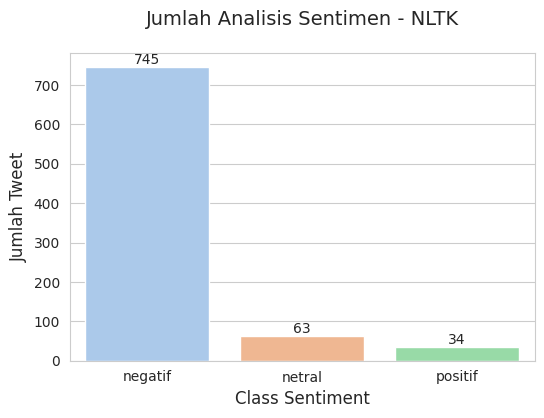

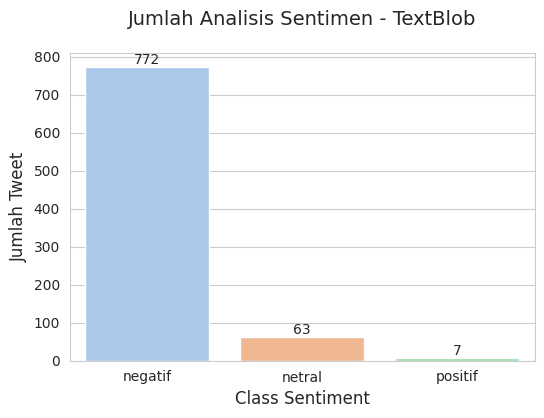

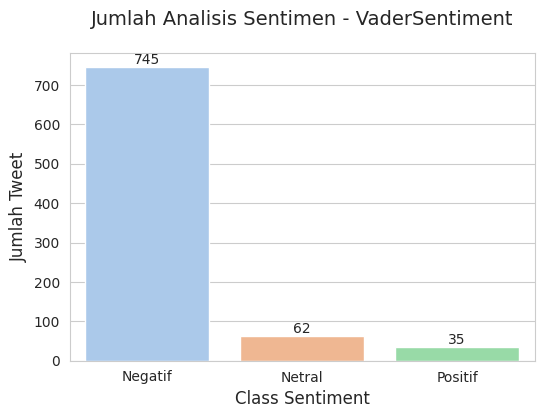

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_count(sentiment_count, title):
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(6,4))
    ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, hue=sentiment_count.index, palette='pastel')
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel('Class Sentiment', fontsize=12)
    plt.ylabel('Jumlah Tweet', fontsize=12)

    for i, count in enumerate(sentiment_count.values):
        ax.text(i, count+0.10, str(count), ha='center', va='bottom')

    plt.show()

# Visualisasi untuk data1
sentiment_count = data1['sentiment'].value_counts()
plot_sentiment_count(sentiment_count, 'Jumlah Analisis Sentimen - NLTK')

# Visualisasi untuk data2
sentiment_count1 = data2['sentiment'].value_counts()
plot_sentiment_count(sentiment_count1, 'Jumlah Analisis Sentimen - TextBlob')

# Visualisasi untuk data3
sentiment_count2 = data3['Sentiments'].value_counts()
plot_sentiment_count(sentiment_count2, 'Jumlah Analisis Sentimen - VaderSentiment')


*Dari ketiga metode di atas dapat disimpulkan bahwa dari dataset yang didapatkan diapaktakan sentimen negatif dengan jumlah terbanyak terhadap isu film "Dirty Vote", namun hal ini perlu elaborasi lebih lanjut, mengingat dataset yang dimiliki hanya berjumlah 842*